In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import lightgbm as lgbm 

/Users/ds1989/opt/anaconda3/envs/SML/lib/python3.8/site-packages/lightgbm/__init__.py:42: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  warnings.warn("Starting from version 2.2.1, the library file in distribution wheels for macOS "


In [2]:
RawData = pd.read_csv('RawData.csv')
df = RawData.set_index('Name')
df.drop(['Date'], axis = 1, inplace = True)
df

,Team,Season,Round,Home Team,Away Team,Home Score,Away Score,Margin,Disposals,Kicks,...,Frees For,Frees Against,Contested Pos,Uncontested Pos,Contested Marks,Marks Inside 50,One Percenters,Goal Assists,Brownlow Votes,TOG
Name,,,,,,,,,,,,,,,,,,,,,
Zac Williams,Greater Western Sydney,2019.0,GF,Richmond,Greater Western Sydney,114,25,89,21.0,11.0,...,0.0,0.0,7.0,13.0,0.0,1.0,0.0,0.0,0.0,68
Lachie Whitfield,Greater Western Sydney,2019.0,GF,Richmond,Greater Western Sydney,114,25,89,14.0,12.0,...,0.0,1.0,4.0,9.0,0.0,0.0,1.0,0.0,0.0,91
Adam Tomlinson,Greater Western Sydney,2019.0,GF,Richmond,Greater Western Sydney,114,25,89,17.0,11.0,...,0.0,1.0,6.0,11.0,0.0,0.0,1.0,0.0,0.0,83
Sam Taylor,Greater Western Sydney,2019.0,GF,Richmond,Greater Western Sydney,114,25,89,14.0,6.0,...,1.0,0.0,6.0,8.0,1.0,0.0,9.0,0.0,0.0,91
Tim Taranto,Greater Western Sydney,2019.0,GF,Richmond,Greater Western Sydney,114,25,89,30.0,14.0,...,3.0,1.0,15.0,18.0,0.0,0.0,1.0,0.0,0.0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wayne Carey,Adelaide,2003.0,1,Adelaide,Fremantle,145,89,56,12.0,10.0,...,1.0,2.0,9.0,4.0,3.0,4.0,4.0,2.0,0.0,85
Brett Burton,Adelaide,2003.0,1,Adelaide,Fremantle,145,89,56,21.0,12.0,...,0.0,0.0,9.0,11.0,0.0,0.0,1.0,0.0,0.0,90
Matthew Bode,Adelaide,2003.0,1,Adelaide,Fremantle,145,89,56,22.0,12.0,...,1.0,2.0,9.0,12.0,0.0,0.0,1.0,0.0,0.0,96


In [3]:
# Create a potentially useful feature: whether the team is home team
df = df.assign(Is_Home_Team = lambda x: x['Team'] == x['Home Team']) 
df.Is_Home_Team = df['Is_Home_Team'].astype('int')

In [4]:
# One-hot encode the categorical variables
df_One_Hot = pd.get_dummies(df)
df_One_Hot

,Season,Home Score,Away Score,Margin,Disposals,Kicks,Marks,Handballs,Goals,Behinds,...,Away Team_Greater Western Sydney,Away Team_Hawthorn,Away Team_Melbourne,Away Team_North Melbourne,Away Team_Port Adelaide,Away Team_Richmond,Away Team_St Kilda,Away Team_Sydney,Away Team_West Coast,Away Team_Western Bulldogs
Name,,,,,,,,,,,,,,,,,,,,,
Zac Williams,2019.0,114,25,89,21.0,11.0,4.0,10.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
Lachie Whitfield,2019.0,114,25,89,14.0,12.0,3.0,2.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
Adam Tomlinson,2019.0,114,25,89,17.0,11.0,6.0,6.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
Sam Taylor,2019.0,114,25,89,14.0,6.0,4.0,8.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
Tim Taranto,2019.0,114,25,89,30.0,14.0,5.0,16.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wayne Carey,2003.0,145,89,56,12.0,10.0,7.0,2.0,4.0,2.0,...,0,0,0,0,0,0,0,0,0,0
Brett Burton,2003.0,145,89,56,21.0,12.0,5.0,9.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
Matthew Bode,2003.0,145,89,56,22.0,12.0,3.0,10.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train = df_One_Hot.query('Season < 2016').sample(frac = 1)
test = df_One_Hot.query('Season >= 2016').sample(frac = 1)

xtrain = train.drop(['Brownlow Votes'], axis = 1)
xtest  = test.drop(['Brownlow Votes'], axis = 1)
ytrain = train['Brownlow Votes']
ytest  = test['Brownlow Votes']

In [6]:
# Try Full Model with Logistic Regression as the Baseline 

lr = LogisticRegression(penalty='l2',
                        C = 0.5,
                        solver= 'lbfgs',
                        class_weight = 'balanced', 
                        max_iter = 1000)
lr.fit(xtrain, ytrain)
lr_prediction = lr.predict(xtest)
print(classification_report(ytest, lr_prediction))

              precision    recall  f1-score   support

         0.0       1.00      0.78      0.87     34137
         1.0       0.04      0.34      0.08       765
         2.0       0.10      0.17      0.13       765
         3.0       0.24      0.75      0.37       765

    accuracy                           0.75     36432
   macro avg       0.35      0.51      0.36     36432
weighted avg       0.94      0.75      0.83     36432



/Users/ds1989/opt/anaconda3/envs/SML/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
# Use LightGBM to filter important features

train_gbm = lgbm.Dataset(xtrain, ytrain)
test_gbm = lgbm.Dataset(xtest, ytest)

# Define Parameters
gbm_parameters = {
    'objective': 'multiclass',
    'metric': {'multi_logloss'},
    'is_unbalance': True,
    'num_class': 4,
    'boosting': 'gbdt',
    'num_leaves':500,
    'max_depth': 8,
    'bagging_fraction': 0.5,
    'feature_fraction': 0.8,
    'bagging_freq': 20,
    'learning_rate':0.1,
    'verbose': 0,
    'lambda_l1': 0.5,
    'min_gain_to_split': 60
}

print('Training started')
# Train LightGBM Model
gbm_model = lgbm.train(gbm_parameters,
                   train_gbm,
                   valid_sets = test_gbm,
                   num_boost_round=100,
                   early_stopping_rounds=100)
print('gbm done')

Training started
[1]	valid_0's multi_logloss: 0.274835
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 0.260804
[3]	valid_0's multi_logloss: 0.251362
[4]	valid_0's multi_logloss: 0.245542
[5]	valid_0's multi_logloss: 0.240598
[6]	valid_0's multi_logloss: 0.236722
[7]	valid_0's multi_logloss: 0.232756
[8]	valid_0's multi_logloss: 0.229609
[9]	valid_0's multi_logloss: 0.226797
[10]	valid_0's multi_logloss: 0.225154
[11]	valid_0's multi_logloss: 0.222991
[12]	valid_0's multi_logloss: 0.221313
[13]	valid_0's multi_logloss: 0.219903
[14]	valid_0's multi_logloss: 0.218756
[15]	valid_0's multi_logloss: 0.218028
[16]	valid_0's multi_logloss: 0.217204
[17]	valid_0's multi_logloss: 0.216266
[18]	valid_0's multi_logloss: 0.21568
[19]	valid_0's multi_logloss: 0.214935
[20]	valid_0's multi_logloss: 0.21424
[21]	valid_0's multi_logloss: 0.213818
[22]	valid_0's multi_logloss: 0.213309
[23]	valid_0's multi_logloss: 0.212757
[24]	valid_0's multi_logloss: 0.212

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

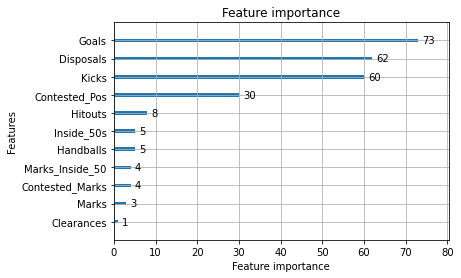

In [8]:
# Check on the Importance of Each Feature
lgbm.plot_importance(gbm_model)

In [9]:
selected_features = gbm_model.feature_importance().nonzero()[0]
selected_features

array([ 4,  5,  6,  7,  8, 10, 13, 14, 18, 20, 21])

In [10]:
xtrain_new = xtrain.iloc[:, selected_features]
xtest_new  = xtest.iloc[:, selected_features]
# ytrain = train['Brownlow Votes']
# ytest  = test['Brownlow Votes']

xtrain_new

,Disposals,Kicks,Marks,Handballs,Goals,Hitouts,Inside 50s,Clearances,Contested Pos,Contested Marks,Marks Inside 50
Name,,,,,,,,,,,
Steven Motlop,23.0,14.0,4.0,9.0,2.0,0.0,4.0,1.0,5.0,0.0,0.0
Ben McKinley,5.0,4.0,2.0,1.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0
Heath Grundy,16.0,9.0,6.0,7.0,0.0,0.0,1.0,0.0,4.0,1.0,0.0
James Sellar,19.0,4.0,4.0,15.0,1.0,5.0,2.0,2.0,7.0,1.0,1.0
Daniel Schell,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
Tom Murphy,12.0,3.0,2.0,9.0,0.0,0.0,1.0,1.0,5.0,0.0,0.0
Jake Melksham,15.0,11.0,8.0,4.0,1.0,0.0,3.0,0.0,4.0,2.0,1.0
Brent Staker,13.0,9.0,1.0,4.0,1.0,0.0,1.0,1.0,8.0,0.0,0.0


In [11]:
# Logistic Regression Again

lr_new = LogisticRegression(penalty='l2',
                        C = 0.5,
                        solver= 'lbfgs',
                        class_weight = 'balanced', 
                        max_iter = 1000)

lr_new.fit(xtrain_new, ytrain)
lr_prediction_new = lr_new.predict(xtest_new)

print(classification_report(ytest, lr_prediction_new))

              precision    recall  f1-score   support

         0.0       1.00      0.77      0.87     34137
         1.0       0.04      0.36      0.08       765
         2.0       0.09      0.16      0.11       765
         3.0       0.25      0.73      0.37       765

    accuracy                           0.75     36432
   macro avg       0.34      0.50      0.36     36432
weighted avg       0.94      0.75      0.82     36432



In [12]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 20), 
                    solver='adam',
                    learning_rate_init=0.001,
                    activation='tanh',
                    alpha=0.00001,
                    learning_rate = 'adaptive')
mlp.fit(xtrain_new, ytrain)

MLPClassifier(activation='tanh', alpha=1e-05, hidden_layer_sizes=(10, 20),
              learning_rate='adaptive')

In [13]:
# 10, 10
mlp_predictions = mlp.predict(xtest_new)
print(classification_report(ytest, mlp_predictions, zero_division=False))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     34137
         1.0       0.00      0.00      0.00       765
         2.0       0.20      0.00      0.00       765
         3.0       0.42      0.45      0.43       765

    accuracy                           0.94     36432
   macro avg       0.39      0.36      0.35     36432
weighted avg       0.91      0.94      0.92     36432



In [15]:
# Future ideas: 

# 1. Dual classifier: start with binary medal/no-medal classification first and
#     then build another classifier using only the data with non-zero medal
#     prediction from the fist step to further classify the number of medals. 
        
# 2. More feature selection methods: Lasso, Mutual Information, etc.

# 3. Class imbalance issue: could also try to generate synthesised 
#     samples using SMOTE algorithm to upsample minority classes
